## Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fetching data

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

## Feature Engineering

### One-hot

In [ ]:
df['male'] = pd.get_dummies(df['sex'], drop_first=True, dtype=int)
df.head()

In [ ]:
df['issmoker'] = pd.get_dummies(df['smoker'], drop_first=True, dtype=int)
df.head()

In [ ]:
df['region'].unique()

In [ ]:
df['region_oneHot'] = np.zeros(df.shape[0])
for i in range((df.shape[0])):
    if df['region'].iloc[i] == 'southwest':
        df['region_oneHot'] = -3
    if df['region'].iloc[i] == 'southeast':
        df['region_oneHot'] = -1
    if df['region'].iloc[i] == 'northeast':
        df['region_oneHot'] = 1
    if df['region'].iloc[i] == 'northwest':
        df['region_oneHot'] = 3
df.head()

## Exploratory Analysis

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

In [ ]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'issmoker')
sns.despine(left = True)

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'issmoker')

In [ ]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'issmoker', ax = ax[1])

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'issmoker')

In [ ]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)

## Splitting the data

In [ ]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=45)

In [ ]:
x_train.shape

In [ ]:
df.head()

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

## Support Vector regression

In [72]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [73]:
regressor.score(scaled_x_test, y_test)

-0.09218927558958989

In [74]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)

140555441.5150369

Text(0.5, 0, 'Predict')

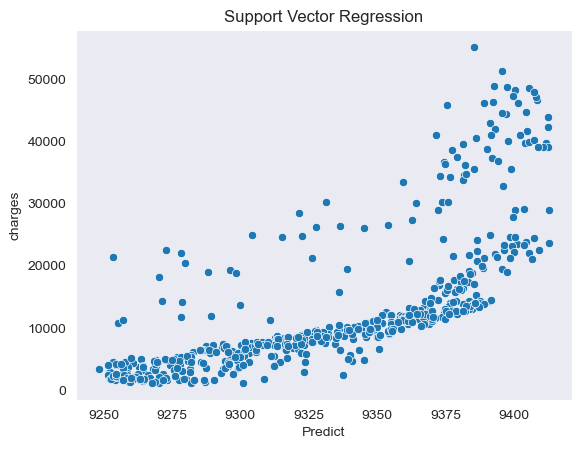

In [78]:
sns.set_style('dark')
f = sns.scatterplot(x = predict ,y = y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')